# Linear Regression model example using generated data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = 2 * np.random.rand(100,1)
y = 4 + 3 * x + np.random.randn(100,1)

Text(0, 0.5, '$y$')

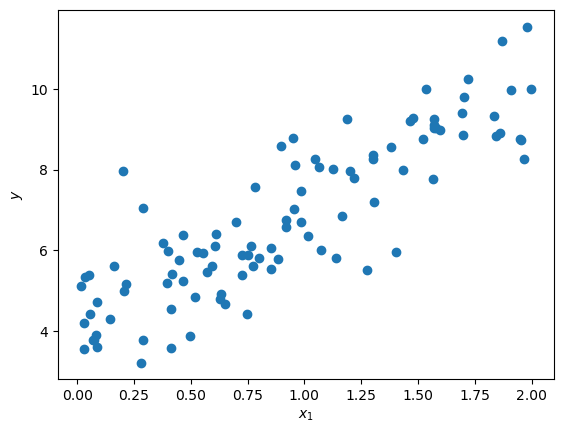

In [3]:
plt.scatter(x,y)
plt.xlabel('$x_1$')
plt.ylabel('$y$')

In [4]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression().fit(x,y)
regressor.score(x,y)

0.7443958013992547

In [5]:
print(regressor.coef_, regressor.intercept_)

[[2.90428816]] [4.12327362]


## Visualization

In [6]:
min_x = x.min()
max_x = x.max()
min_x, max_x

(0.014996784610274094, 1.9995627137230063)

In [7]:
x_intervalo = np.linspace(min_x, max_x, 100)
x_intervalo = x_intervalo.reshape(-1, 1)
# print(x_intervalo.shape)
# print(x_intervalo)

In [8]:
y_intervalo = regressor.predict(x_intervalo)
# print(y_intervalo.shape)
# print(y_intervalo)

Text(0, 0.5, '$y$')

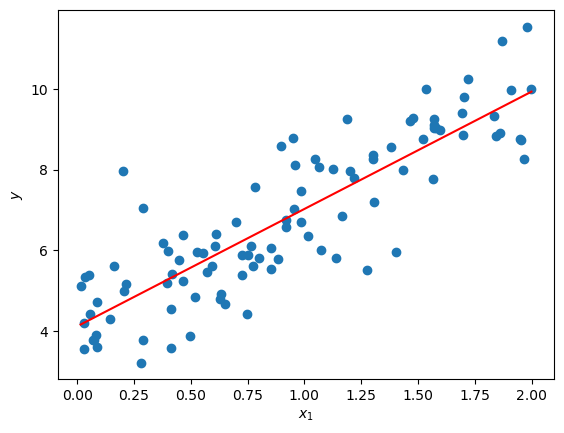

In [9]:
plt.scatter(x,y)
plt.plot(x_intervalo, y_intervalo, color='red')
plt.xlabel('$x_1$')
plt.ylabel('$y$')

# Linear Regression model example using SKLearn's diabetes dataset

In [10]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
diabetes_x, diabetes_y = datasets.load_diabetes(return_X_y=True)
print(diabetes_x.shape, diabetes_y.shape)

(442, 10) (442,)


In [14]:
subset_diabetes_x = diabetes_x[:, None, 2]
subset_diabetes_x.shape

(442, 1)

In [15]:
x_training = subset_diabetes_x[:-20]
x_testing = subset_diabetes_x[-20:]

y_training = diabetes_y[:-20]
y_testing = diabetes_y[-20:]

print(x_training.shape,y_training.shape,
      x_testing.shape,y_testing.shape)

(422, 1) (422,) (20, 1) (20,)


In [17]:
real_regressor = linear_model.LinearRegression()
real_regressor.fit(x_training,y_training)

diabetes_y_pred = real_regressor.predict(x_testing)
diabetes_y_pred

array([225.9732401 , 115.74763374, 163.27610621, 114.73638965,
       120.80385422, 158.21988574, 236.08568105, 121.81509832,
        99.56772822, 123.83758651, 204.73711411,  96.53399594,
       154.17490936, 130.91629517,  83.3878227 , 171.36605897,
       137.99500384, 137.99500384, 189.56845268,  84.3990668 ])

In [21]:
print("Coeficient:",real_regressor.coef_,"\n",
      "Bias:",real_regressor.intercept_)

mse = mean_squared_error(y_testing,diabetes_y_pred)
print("MSE %.2f" % mse)

r2 = r2_score(y_testing,diabetes_y_pred)
print("Determination coeficient - r^2 %.2f" % r2)

Coeficient: [938.23786125] 
 Bias: 152.91886182616113
MSE 2548.07
Determination coeficient - r^2 0.47


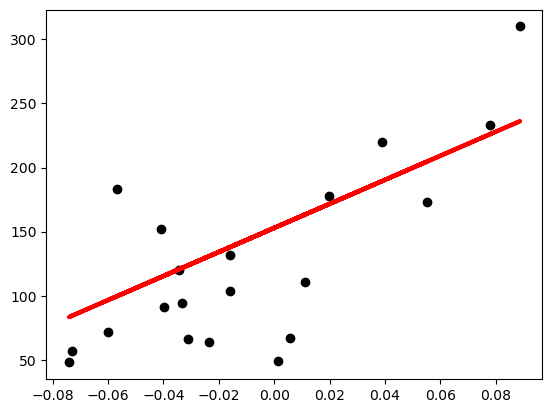

In [20]:
plt.scatter(x_testing,y_testing,color="black")
plt.plot(x_testing,diabetes_y_pred,color="red",linewidth=3)